In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")

In [6]:
print(df.dtypes)
print(df["Дата"].head())

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object
0   2018-04-01
1   2018-04-01
2   2018-04-01
3   2018-04-01
4   2018-04-01
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby("Дата").size().reset_index(name="Количество")

print(grouped_df.head())

        Дата  Количество
0 2018-01-02        1521
1 2018-01-03        1387
2 2018-01-04        1455
3 2018-01-05        1481
4 2018-01-06        1467


Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head(10))

        Дата  Количество
0 2018-01-02        1521
1 2018-01-03        1387
2 2018-01-04        1455
3 2018-01-05        1481
4 2018-01-06        1467
5 2018-01-07        1411
6 2018-01-08        1445
7 2018-02-02        1472
8 2018-02-03        1405
9 2018-02-05        1454


Нарисуйте график продаж у `grouped_df`

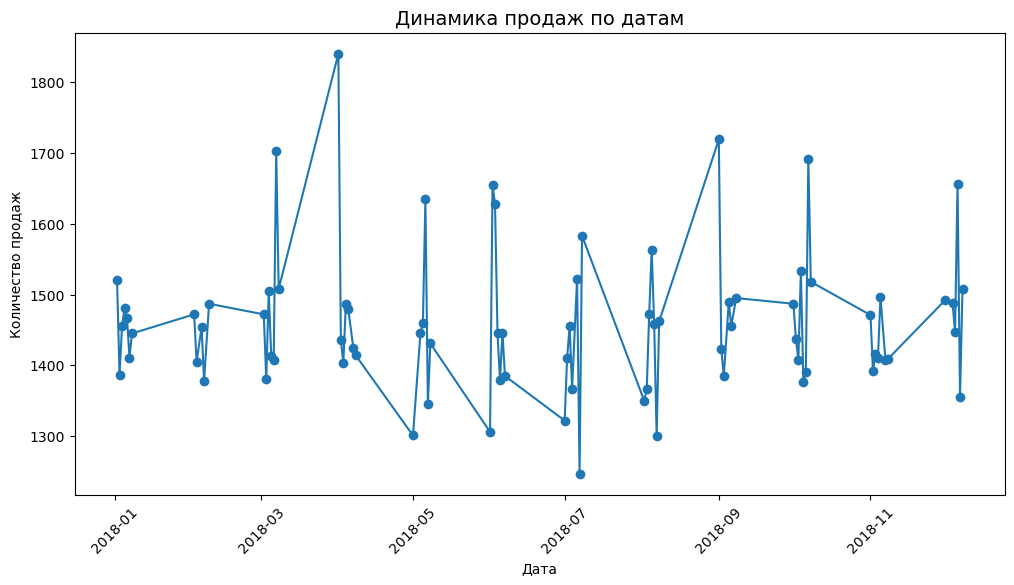

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df["Дата"], grouped_df["Количество"], marker="o")
plt.title("Динамика продаж по датам", fontsize=14)
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Продажа до марта была низкая, но с марта по апрель была максимальное количество продаж. май, июнь, июль схожий график, продажа к концу месяца уменьшается
и под конец резкий скачок вверх, что видимо связано с поступлением зарплаты. Август много скачков продаж, а вот к сентябрю опять количество постопенно
увеличивается. Также резкое увеливение продаж есть в октябре и декабре.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [17]:
Q1 = grouped_df['Количество'].quantile(0.25)
Q3 = grouped_df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = grouped_df[(grouped_df['Количество'] < lower_bound) | (grouped_df['Количество'] > upper_bound)]
print(outliers)

         Дата  Количество
17 2018-03-07        1702
19 2018-04-01        1840
29 2018-05-06        1635
33 2018-06-02        1654
34 2018-06-03        1628
44 2018-07-07        1247
53 2018-09-01        1719
65 2018-10-07        1691
77 2018-12-06        1656


In [18]:
if not outliers.empty:
    max_outlier = outliers.loc[outliers['Количество'].idxmax()]
    print(max_outlier)
else:
    print("Выбросов нет")

Дата          2018-04-01 00:00:00
Количество                   1840
Name: 19, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [19]:
df_3 = df[df['Склад'] == 3]

In [20]:
df_summer = df_3[df_3['Дата'].dt.month.isin([6,7,8])]

In [21]:
df_wednesdays = df_summer[df_summer['Дата'].dt.weekday == 2]

In [22]:
top_products = df_wednesdays.groupby('Номенклатура')['Количество'].sum()

In [23]:
top_product = top_products.idxmax()
top_sales = top_products.max()

In [24]:
print(f"Топовый товар по средам за лето на складе 3: {top_product}, всего продано: {top_sales}")

Топовый товар по средам за лето на складе 3: product_1, всего продано: 479


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [37]:
pip install xlrd

In [38]:

df_weather = pd.read_excel('Astananew.xls')

In [39]:
print(df_weather.head())

  Местное время в Астане     T
0       31.12.2018 23:00 -18.4
1       31.12.2018 20:00 -17.2
2       31.12.2018 17:00 -14.8
3       31.12.2018 14:00 -11.2
4       31.12.2018 11:00 -12.7


In [40]:
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Астане  2918 non-null   object 
 1   T                       2918 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.7+ KB
None


In [41]:
df_weather['Дата'] = pd.to_datetime(df_weather['Местное время в Астане'], dayfirst=True)

In [42]:
df_weather_avg = df_weather.groupby(df_weather['Дата'].dt.date)['T'].mean().reset_index()
df_weather_avg.rename(columns={'Дата': 'Дата'}, inplace=True)
df_weather_avg['Дата'] = pd.to_datetime(df_weather_avg['Дата'])

In [43]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])
df_combined = pd.merge(grouped_df, df_weather_avg, on='Дата', how='left')

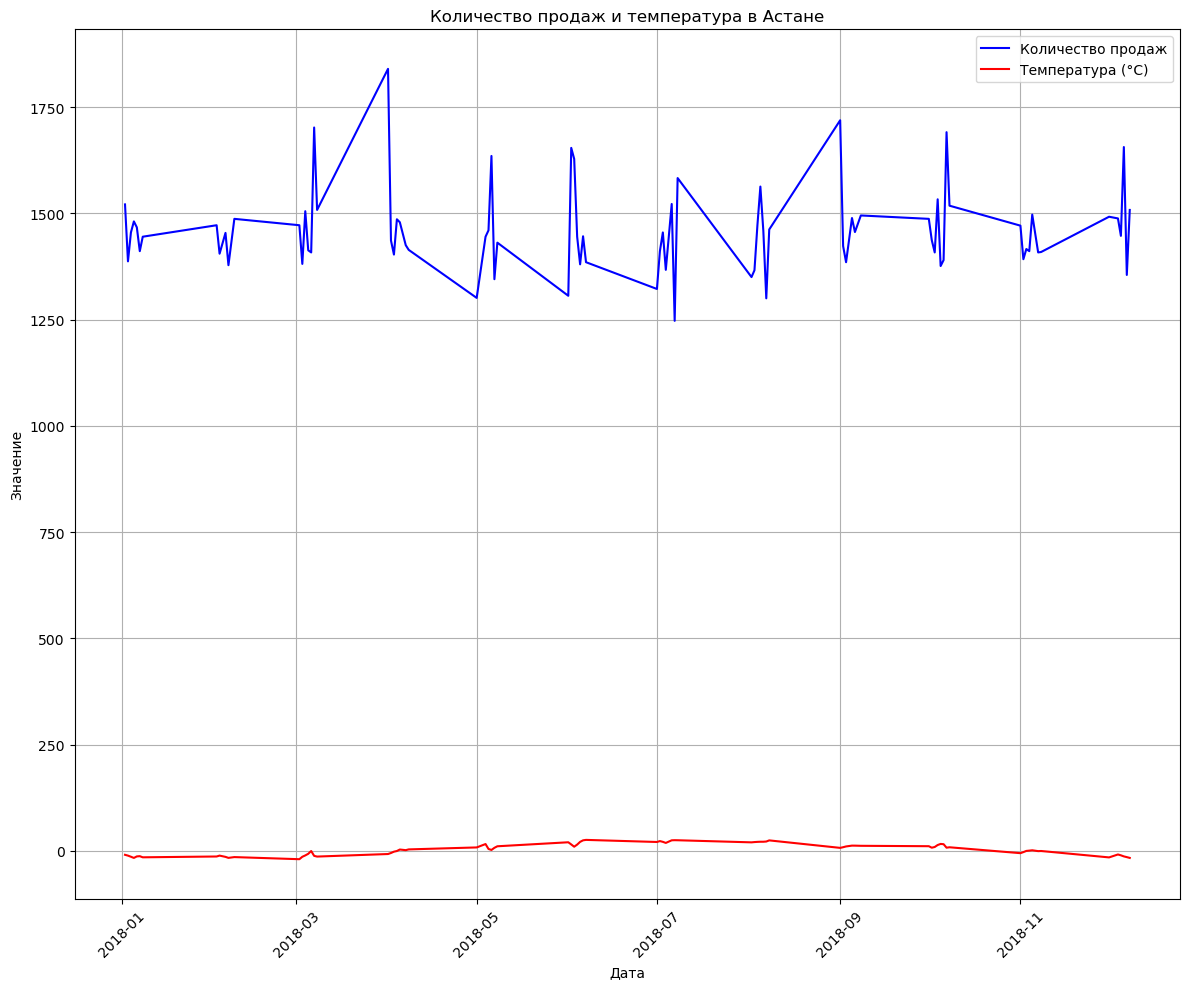

In [46]:
plt.figure(figsize=(12,10))
plt.plot(df_combined['Дата'], df_combined['Количество'], label='Количество продаж', color='blue')
plt.plot(df_combined['Дата'], df_combined['T'], label='Температура (°C)', color='red')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Количество продаж и температура в Астане')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

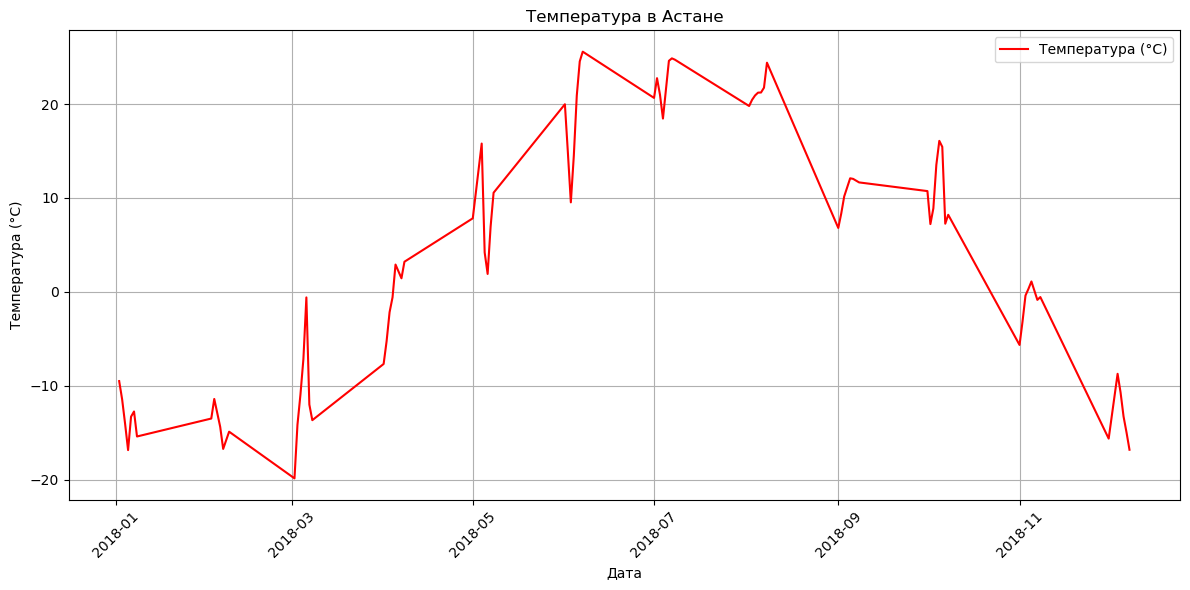

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df_combined['Дата'], df_combined['T'], label='Температура (°C)', color='red')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура в Астане')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()